In [8]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency
print("Setup comlete")

Setup comlete


In [10]:
mental_health = pd.read_csv('Mental Health Dataset.csv',index_col='Country', parse_dates=True)
mental_health.head()

/var/folders/nv/rb1zm3m14hx2v9m2qxpb437h0000gn/T/ipykernel_28322/942706173.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mental_health = pd.read_csv('Mental Health Dataset.csv',index_col='Country', parse_dates=True)


,Timestamp,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
Country,,,,,,,,,,,,,,,,
United States,8/27/2014 11:29,Female,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
United States,8/27/2014 11:31,Female,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
United States,8/27/2014 11:32,Female,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
United States,8/27/2014 11:37,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
United States,8/27/2014 11:43,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [11]:
columns_list = mental_health.columns
print(columns_list)

Index(['Timestamp', 'Gender', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')


In [12]:
missing_values_count = mental_health.isnull().sum()
print(missing_values_count)

Timestamp                     0
Gender                        0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [13]:
mental_health = mental_health.dropna(subset=['self_employed'])
missing_values_count = mental_health.isnull().sum()
print(missing_values_count)

Timestamp                  0
Gender                     0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [14]:
gender_distribution =  mental_health['Gender'].value_counts()
print("Gender Distribution:\n", gender_distribution)

Gender Distribution:
 Gender
Male      235950
Female     51212
Name: count, dtype: int64


In [15]:
treatment_by_gender = pd.crosstab(mental_health['Gender'], mental_health['treatment'])
print("Treatment by Gender:\n", treatment_by_gender)

Treatment by Gender:
 treatment      No     Yes
Gender                   
Female      16058   35154
Male       126360  109590


In [16]:
treatment_by_gender_proporsions = treatment_by_gender.div(treatment_by_gender.sum(1), axis=0)
print("Proportion of Treatment:\n", treatment_by_gender_proporsions)

Proportion of Treatment:
 treatment        No       Yes
Gender                       
Female     0.313559  0.686441
Male       0.535537  0.464463


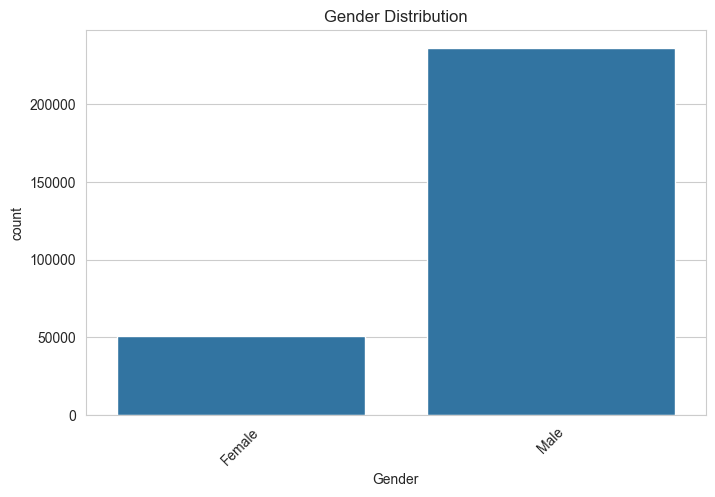

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=mental_health)
plt.title("Gender Distribution")
plt.xticks(rotation=45)
plt.show()

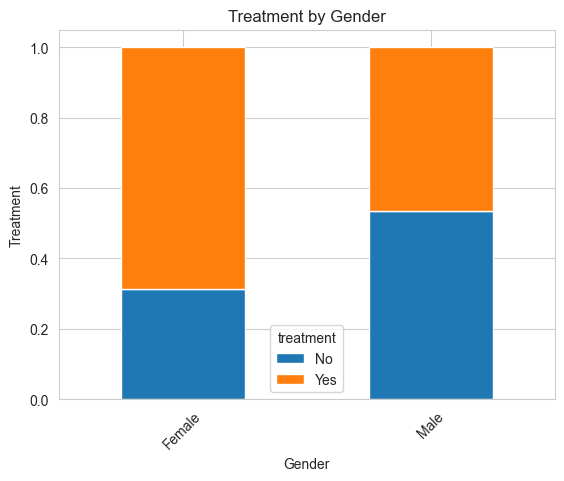

In [18]:
treatment_by_gender_proporsions.plot(kind='bar', stacked=True)
plt.title("Treatment by Gender")
plt.xticks(rotation=45)
plt.xlabel("Gender")
plt.ylabel("Treatment")
plt.show()

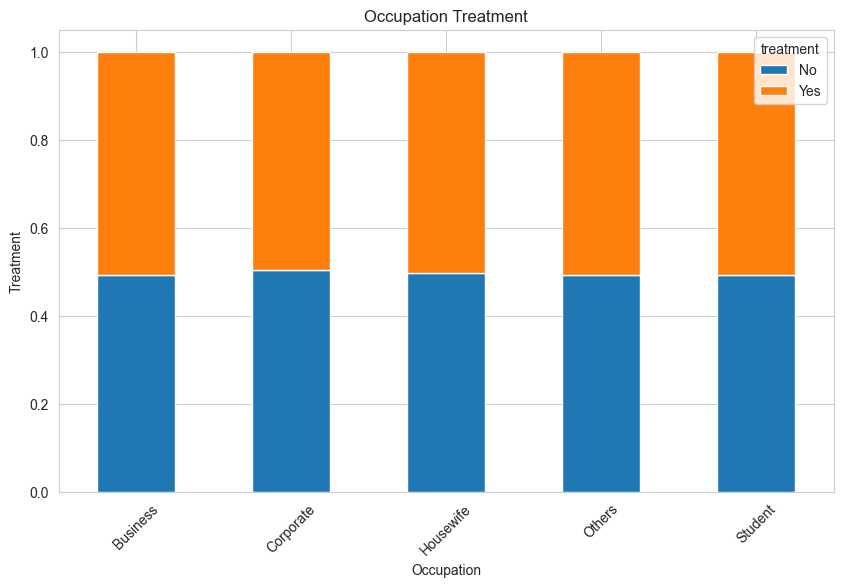

In [19]:
occupation_treatment = pd.crosstab(mental_health['Occupation'], mental_health['treatment'])
occupation_treatment_proportion = occupation_treatment.div(occupation_treatment.sum(1), axis=0)
occupation_treatment_proportion.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Occupation Treatment")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Treatment")
plt.show()

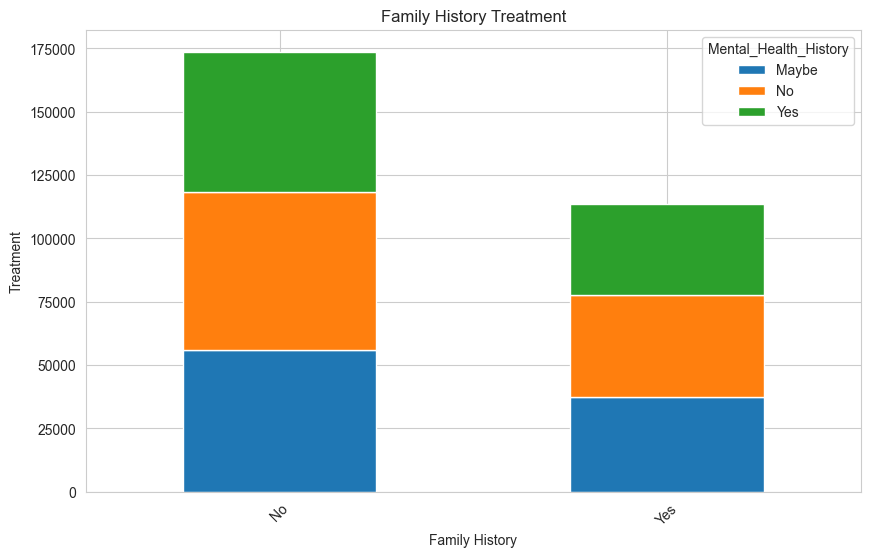

In [20]:
cross_tab_history = pd.crosstab(mental_health['family_history'], mental_health['Mental_Health_History'])
cross_tab_treatment = pd.crosstab(mental_health['family_history'], mental_health['treatment'])

cross_tab_history.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Family History Treatment")
plt.xticks(rotation=45)
plt.xlabel("Family History")
plt.ylabel("Treatment")
plt.show()